In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
from lsd import DB
import lsd.bounds as b

In [5]:
db = DB(os.environ['LSD_DB'])
#db = DB('/Linux64/lsd/master-gc732036f69/lib/python/surveys/sdss')
bounds_xy = b.rectangle(110., 0., 230., 60.)
rows = db.query('ra, dec, g, r, g-r as grx from sdss').fetch(bounds=[(bounds_xy, None)])

 [480 el.]WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
::::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
::::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
::::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
::::WARNING:lsd.pool2:Error contacting lsd-manager. Cannot coordinate resource usage with others, using 2 cores.
:>  178.07 sec


In [6]:
rows.ra.shape

(86409605,)

red: 21.33 < r <22.0
green: 20.66 < r ≤ 21.33
blue: 20.0 < r ≤ 20.66

In [7]:
data = rows[rows.grx < 0.4]
rar = data.ra[(21.33 < data.r) & (data.r < 22.0)]
decr = data.dec[(21.33 < data.r) & (data.r < 22.0)]
rag = data.ra[(20.66 < data.r) & (data.r < 21.33)]
decg = data.dec[(20.66 < data.r) & (data.r < 21.33)]
rab = data.ra[(20.0 < data.r) & (data.r < 20.66)]
decb = data.dec[(20.0 < data.r) & (data.r < 20.66)]

bdec = (data.dec.max() - data.dec.min())/2
bra = (data.ra.max() - data.dec.min())/2
print bdec, bra

29.9999954056 114.999993068


In [8]:
r, x, y = np.histogram2d(decr,rar,bins=[bdec,bra])
g, x, y = np.histogram2d(decg,rag,bins=[bdec,bra])
b, x, y = np.histogram2d(decb,rab,bins=[bdec,bra])

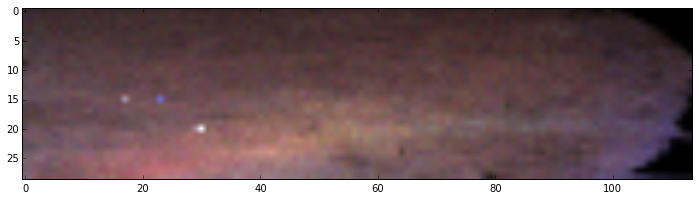

In [13]:
color = np.zeros((bdec,bra,3),dtype='uint8')
color[:,:,0] = r/(r.max()/255)
color[:,:,1] = g/(g.max()/255)
color[:,:,2] = b/(b.max()/255)

fig,ax=plt.subplots(figsize=(12,12))
im = ax.imshow(np.fliplr(np.flipud(color)))